In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install jupyterlab

In [ ]:
# !npm config set prefix /usr/local

In [ ]:
# !npm install localtunnel


In [ ]:
# jupyter_running = !jupyter notebook list | grep 8888
# if not jupyter_running:
#   !mkdir -p /content/.jupyter
#   !echo '{ "NotebookApp": { "password": "4d6ed2c10da3aeaba70c40a26ed2e659b75e3dfd" } }' > /content/.jupyter/jupyter_notebook_config.json
#   get_ipython().system_raw('jupyter lab &')
# !ssh -o ServerAliveInterval=60 -o StrictHostKeyChecking=no -R deviprasadtripathy:80:localhost:8888 serveo.net 1>/dev/null

In [ ]:
# from IPython.lib import passwd
# password = passwd("secret")
# password

In [ ]:
!pip install keras==2.0.8
!pip install tensorflow==1.15

     |████████████████████████████████| 276 kB 5.2 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires keras~=2.6, but you have keras 2.0.8 which is incompatible.
     |████████████████████████████████| 412.3 MB 11 kB/s 
     |████████████████████████████████| 3.8 MB 36.0 MB/s 
     |████████████████████████████████| 50 kB 6.4 MB/s 
     |████████████████████████████████| 503 kB 33.9 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=0c7f4a4eaef49f5d9245d3b66987e218c907e3d94d03877b2819039e70d06884
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tens

In [ ]:
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 923, done.
remote: Total 923 (delta 0), reused 0 (delta 0), pack-reused 923
Receiving objects: 100% (923/923), 139.77 MiB | 11.17 MiB/s, done.
Resolving deltas: 100% (521/521), done.


In [ ]:
import os
os.chdir("/content/drive/My Drive/Mask_RCNN/")
# os.chdir("..")

In [ ]:
pip install h5py==2.10.0

     |████████████████████████████████| 2.9 MB 5.4 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [ ]:
import numpy as np
import cv2
import mrcnn.config
import mrcnn.utils
from mrcnn.model import MaskRCNN
#from mrcnn.model import modellib
from pathlib import Path
import matplotlib as pt
#from twilio.rest import Client

Using TensorFlow backend.


In [ ]:
# !rm -r ak
# !mkdir ak

In [ ]:
# Mask-RCNN config
class MaskRCNNConfig(mrcnn.config.Config):
    NAME = "coco_pretrained_model_config"  
    IMAGES_PER_GPU = 1
    GPU_COUNT = 1
    NUM_CLASSES = 1 + 80  
    DETECTION_MIN_CONFIDENCE = 0.6 #setted to 60%


    # Root dir
ROOT_DIR = Path(".")

#Trained model loc
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

#if not os.path.exists(COCO_MODEL_PATH):
 #   mrcnn.utils.download_trained_weights(COCO_MODEL_PATH)

VIDEO_SOURCE = "images/carpark.mp4"

model = MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=MaskRCNNConfig())

model.load_weights(COCO_MODEL_PATH, by_name=True)

# spotted parking spaces
parked_car_boxes = None
#car_boxes = None
free_space = False

video_capture = cv2.VideoCapture(VIDEO_SOURCE)

free_space_frames = 0
#sms_sent = False
count = 0
counter = 0

# Filter to only cars
def get_car_boxes(boxes, class_ids):
    car_boxes = []

    for i, box in enumerate(boxes):
        if class_ids[i] in [3, 8, 6]:
            car_boxes.append(box)

    return np.array(car_boxes)







Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.







In [ ]:
!nvidia-smi

Fri Oct 15 20:14:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    59W / 149W |   5346MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Current frame counter0


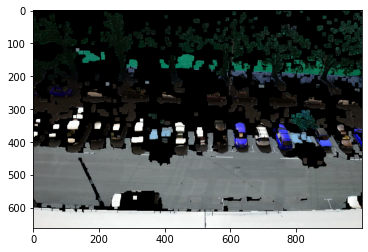

Current frame counter5


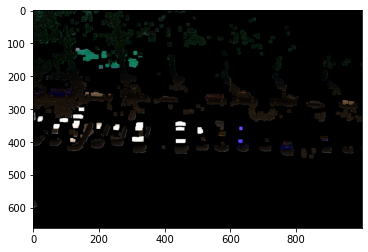

Current frame counter10


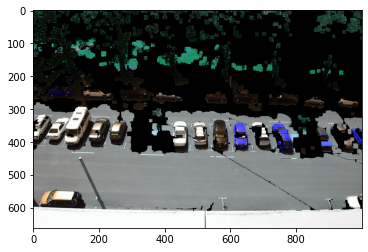

Current frame counter15


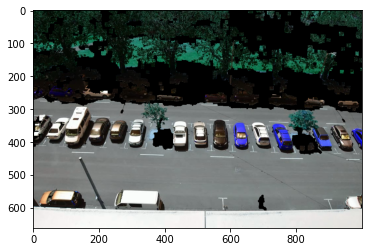

going in to mark vehicles. Frame number:   20
No more frames to read from video!
Video finished


In [ ]:
#main loop
while video_capture.isOpened():
    success, frame = video_capture.read()
    
    #image = frame
    if not success:
        print("No more frames to read from video!")
        break
        
    elif count<20:
      #create another video reader object to compare the two frames and verify the possibility of motion
      success, frame2 = video_capture.read()
      d = cv2.absdiff(frame, frame2)  
      grey = cv2.cvtColor(d, cv2.COLOR_BGR2GRAY)
      blur = cv2.GaussianBlur(grey, (1, 1), 0)
      ret, th = cv2.threshold( blur, 20, 255, cv2.THRESH_BINARY)
      
      #perform these morphological transformations to erode the car which is moving so that it is not detected by MASKRCNN. Take the eorsion levels to be high. 
      dilated = cv2.dilate(th, np.ones((10, 10), np.uint8), iterations=1 )
      eroded = cv2.erode(dilated, np.ones((10, 10), np.uint8), iterations=1 )
        
      #fill the contours for even a better morphing of the vehicle
      c, h = cv2.findContours(eroded, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
      frame2 = cv2.drawContours(frame2, c, -1, (0,0,0), cv2.FILLED)
       
      if count%5 == 0:
        print("Current frame counter" + str(count))
        pt.pyplot.imshow(frame2)
        pt.pyplot.show()
        
      count = count + 1
      continue
    
    # Converting the image from BGR color used by OpenCV to RGB color. 
    '''
    if count==60:
      rgb_image = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)
      count = count+1
    else:
      rgb_image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    '''
    rgb_image = frame[:, :, ::-1]
      #count = count + 1
    results = model.detect([rgb_image], verbose=0)
    r = results[0]
    # The r variable will now have the results of detection:
    # - r['rois'] are the bounding box of each detected object
    # - r['class_ids'] are the class id (type) of each detected object
    # - r['scores'] are the confidence scores for each detection
    # - r['masks'] are the object masks for each detected object (which gives you the object outline)
    if parked_car_boxes is None:
        print("going in to mark vehicles. Frame number:  ", count)
        # Mask R-CNN assumes we are running detection on multiple images.
        # We only passed in one image to detect, so only grab the first result.
       
        #video_capture = cv2.VideoCapture(VIDEO_SOURCE)
        # This is the first frame of video - assume all the cars detected are in parking spaces.
        # Save the location of each car as a parking space box and go to the next frame of video.
        parked_car_boxes = get_car_boxes(r['rois'], r['class_ids'])
          
    elif count%40==0 and len(parked_car_boxes) != 0:

        results = model.detect([rgb_image], verbose=0)
        r = results[0]
        # Get where cars are currently located in the frame
        car_boxes = get_car_boxes(r['rois'], r['class_ids'])

        # See how much those cars overlap with the known parking spaces
        overlaps = mrcnn.utils.compute_overlaps(parked_car_boxes, car_boxes)

        # Assume no spaces are free until we find one that is free
        #free_space = False

        # Loop through each known parking space box
        for parking_area, overlap_areas in zip(parked_car_boxes, overlaps):

            # For this parking space, find the max amount it was covered by any
            # car that was detected in our image (doesn't really matter which car)
            max_IoU_overlap = np.max(overlap_areas)

            # Get the top-left and bottom-right coordinates of the parking area
            y1, x1, y2, x2 = parking_area

            # Check if the parking space is occupied by seeing if any car overlaps
            # it by more than 0.15 using IoU
            if max_IoU_overlap < 0.15:
                # Parking space not occupied! Draw a green box around it
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)
                # Flag that we have seen at least one open space
                free_space = True
                #update the parked car boxes list
                parked_car_boxes = get_car_boxes(r['rois'], r['class_ids'])
            else:
                #free_space = False
                # Parking space is still occupied - draw a red box around it
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 1)

            # Write the IoU measurement inside the box
            font = cv2.FONT_HERSHEY_DUPLEX
            cv2.putText(frame, f"{max_IoU_overlap:0.2}", (x1 + 6, y2 - 6), font, 0.3, (255, 255, 255))

  
        #if free space detected
        if free_space:   
            # Write SPACE AVAILABLE!! on the screen
            font = cv2.FONT_HERSHEY_DUPLEX
            cv2.putText(frame, f"SPACE AVAILABLE!", (10, 150), font, 2.0, (0, 255, 0), 2, cv2.FILLED)
            #cv2.waitKey(3000)
    
        # Show the frame of video on the screen
        # cv2.imshow('Video', frame)
        #saving each frame
    name = str(count) + ".jpg"
    name = os.path.join('./carpark', name)
    cv2.imwrite(name, frame)
    count+=1
    
    #'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Clean up
print("Video finished")
video_capture.release()
# cv2.destroyAllWindows()

In [ ]:
#create video including all the frames in the ak folder
import glob

images = list(glob.iglob(os.path.join('./pexels-3', '*.*')))
images = sorted(images, key=lambda x: float(os.path.split(x)[1][:-3]))

# Get all image file paths to a list.
# Sort the images by name index.
# images = sorted(images, key=lambda x: float(os.path.split(x)[1][:-3]))

def make_video(outvid, images=None, fps=30, size=None,
               is_color=True, format="FMP4"):
    """
    Create a video from a list of images.
 
    @param      outvid      output video
    @param      images      list of images to use in the video
    @param      fps         frame per second
    @param      size        size of each frame
    @param      is_color    color
    @param      format      see http://www.fourcc.org/codecs.php
    @return                 see http://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html
    """
    from cv2 import VideoWriter, VideoWriter_fourcc, imread, resize
    fourcc = VideoWriter_fourcc(*format)
    vid = None
    for image in images:
        if not os.path.exists(image):
            raise FileNotFoundError(image)
        img = imread(image)
        if vid is None:
            if size is None:
                size = img.shape[1], img.shape[0]
            vid = VideoWriter(outvid, fourcc, float(fps), size, is_color)
        if size[0] != img.shape[1] and size[1] != img.shape[0]:
            img = resize(img, size)
        vid.write(img)
    vid.release()
    return vid
  
make_video('./park1_3_58AM.mp4', images, fps=15)  


<VideoWriter 0x7ff69aa5ef70>

In [ ]:
# !cp -a Mask_RCNN/ drive/My\ Drive/AK49/